In [2]:
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
USvideos = pd.read_csv("USvideos.csv")

In [7]:
USvideos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [8]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [12]:
USvideos["channel_title"].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
Netflix                                   193
TheEllenShow                              193
                                         ... 
Stewart Brand                               1
UMF TV                                      1
Dale Dai                                    1
TDAmeritrade                                1
dannotv                                     1
Name: channel_title, Length: 2207, dtype: int64

In [13]:
USvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

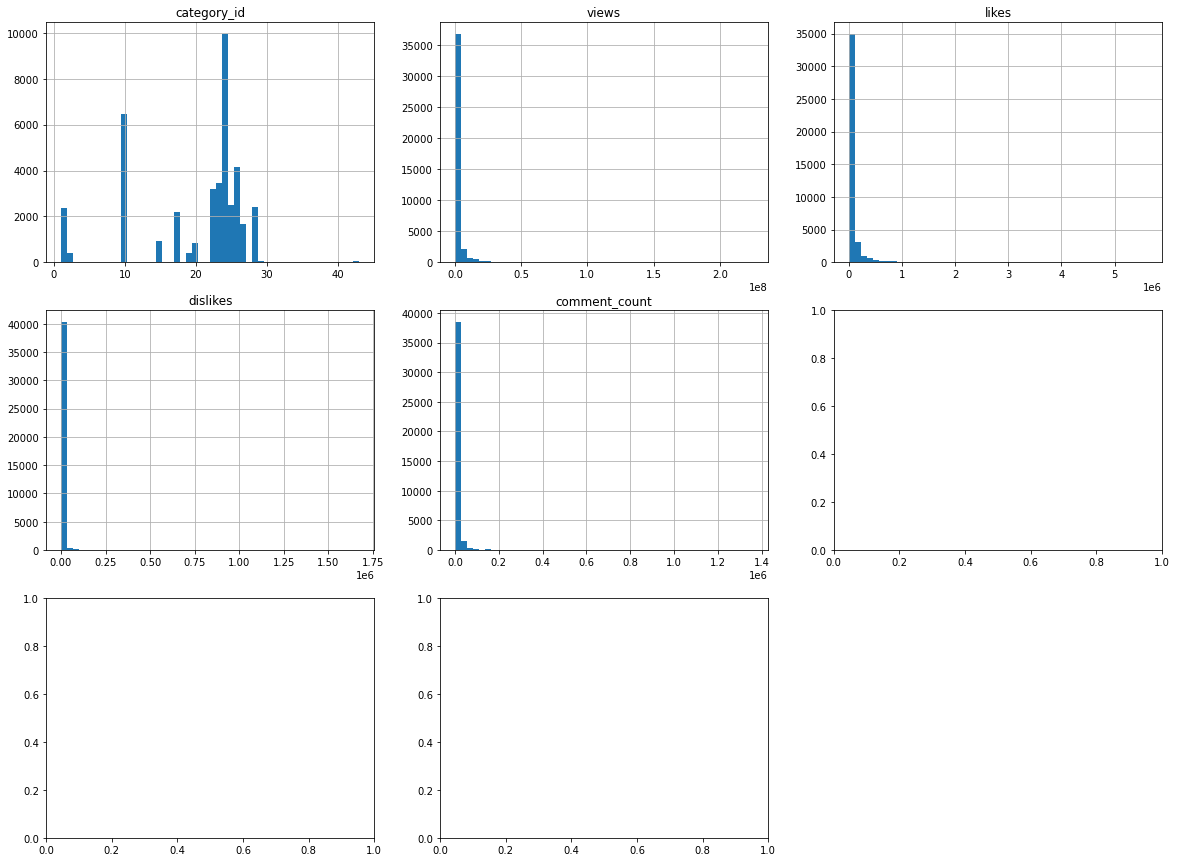

In [14]:
%matplotlib inline

USvideos.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
tmp = USvideos.drop("video_id", axis=1)
tmp = tmp.drop("description", axis=1)
tmp = tmp.drop("trending_date", axis=1)
tmp = tmp.drop("comments_disabled", axis=1)
tmp = tmp.drop("ratings_disabled", axis=1)
tmp = tmp.drop("video_error_or_removed", axis=1)
data = tmp.drop("publish_time", axis=1)

In [24]:
data

,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg
4,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg
...,...,...,...,...,...,...,...,...,...
40944,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg
40945,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg
40947,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg


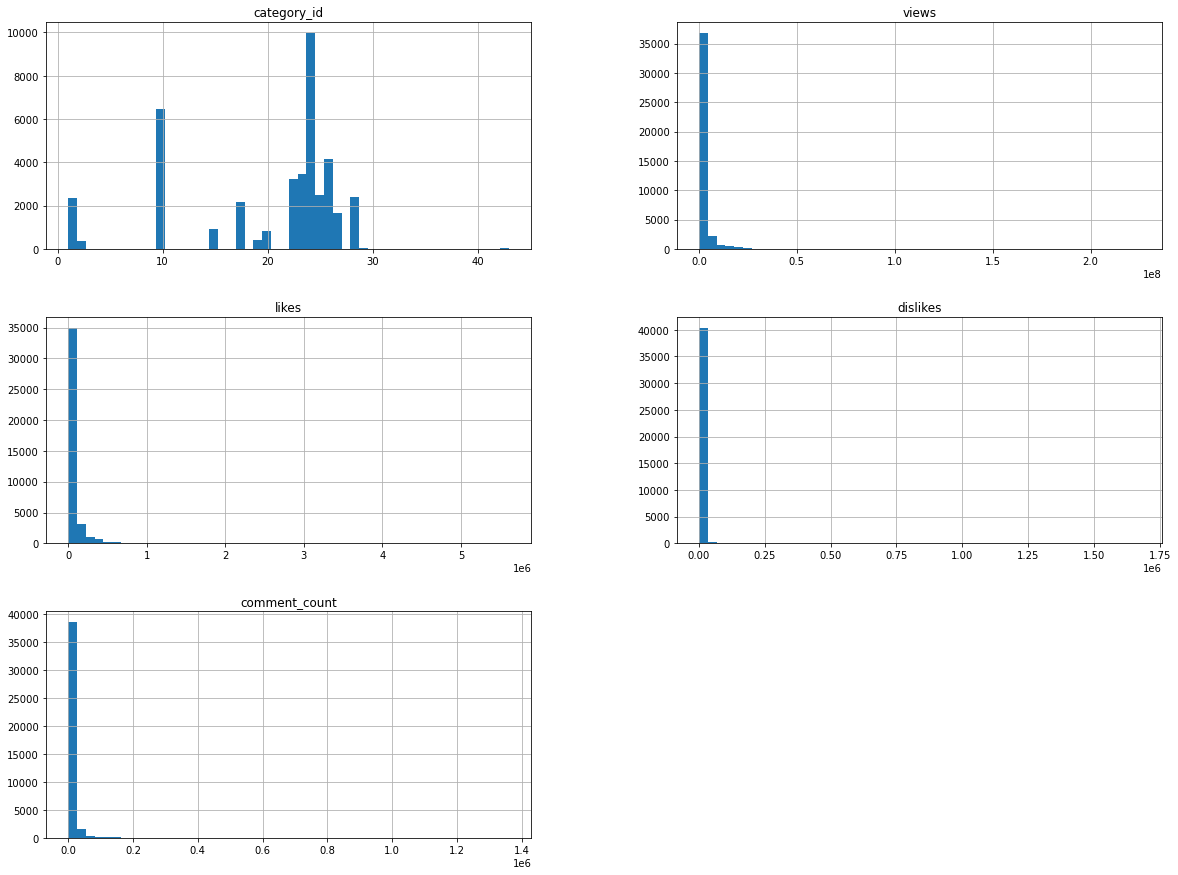

In [25]:
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

## Data Split

In [27]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [28]:
train_set, test_set = split_train_test(USvideos, 0.2)
print(len(train_set))
print(len(test_set))

32760
8189


## 지리적 데이터 시각화

In [29]:
usv = train_set.copy()

<AxesSubplot:xlabel='comment_count', ylabel='likes'>

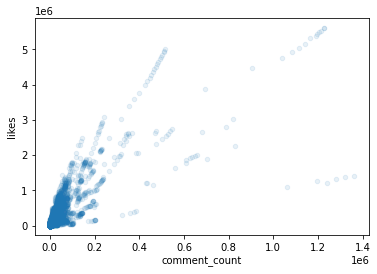

In [36]:
usv.plot(kind="scatter", x="comment_count", y="likes", alpha=0.1)

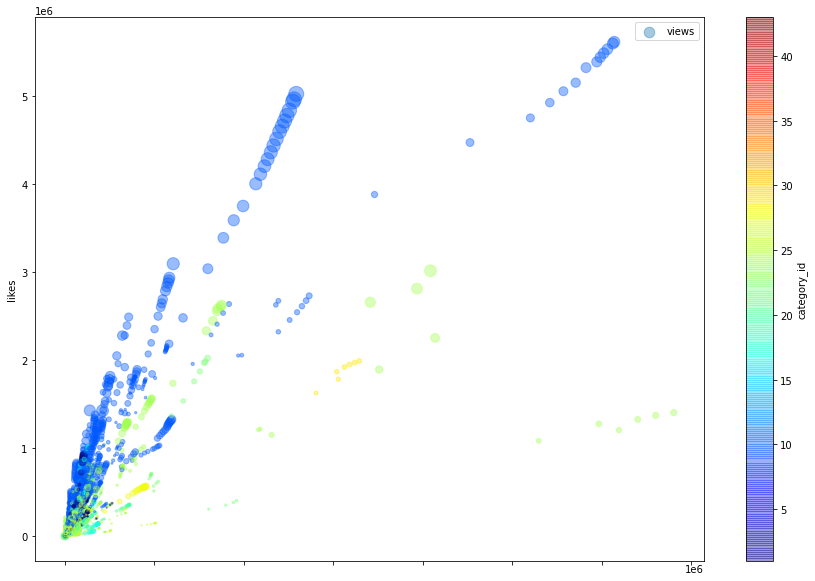

In [53]:
usv.plot(kind="scatter", x="comment_count", y="likes", alpha=0.4, s=usv["views"]/1000000, label="views", figsize=(15,10),
             c="category_id", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [41]:
corr_matrix = usv.corr()

In [42]:
corr_matrix["views"].sort_values(ascending=False)

views                     1.000000
likes                     0.849863
comment_count             0.614187
dislikes                  0.459993
ratings_disabled          0.016526
comments_disabled         0.001284
video_error_or_removed   -0.001760
category_id              -0.167721
Name: views, dtype: float64

array([[<AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>,
        <AxesSubplot:xlabel='dislikes', ylabel='views'>],
       [<AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>],
       [<AxesSubplot:xlabel='views', ylabel='comment_count'>,
        <AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='comment_count'>],
       [<AxesSubplot:xlabel='views', ylabel='dislikes'>,
        <AxesSubplot:xlabel='likes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='dislikes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='dislikes'>]], dtype=object)

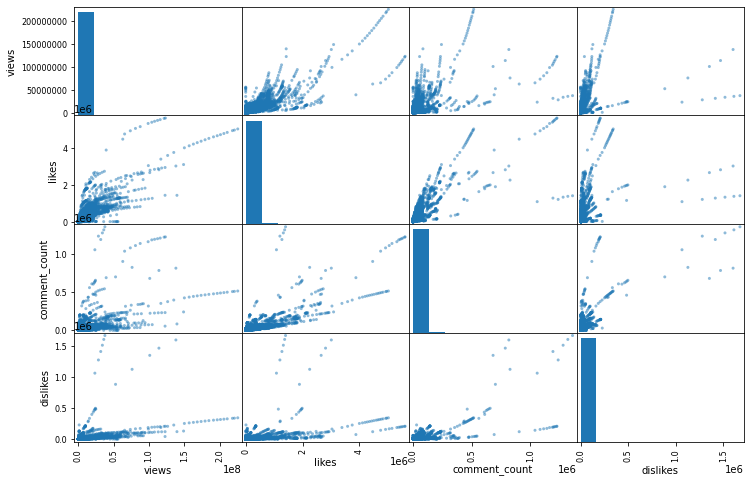

In [43]:
from pandas.plotting import scatter_matrix

attributes = ["views", "likes", "comment_count", "dislikes"]
scatter_matrix(usv[attributes], figsize=(12, 8))

In [45]:
usv_cat = usv[["channel_title"]]
usv_cat.head(10)

,channel_title
24168,Late Night with Seth Meyers
24318,vlogbrothers
6063,Matthias
31404,Janelle Monáe
33275,NFL
33172,Feast Of Fiction
17274,Refinery29
1407,Smosh
19279,Tasty
3634,Taylor Nicole Dean


In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
usv_cat_encoded = ordinal_encoder.fit_transform(usv_cat)
usv_cat_encoded[:10]

array([[ 996.],
       [2159.],
       [1132.],
       [ 847.],
       [1232.],
       [ 613.],
       [1449.],
       [1580.],
       [1671.],
       [1674.]])

In [47]:
ordinal_encoder.categories_

[array(['12 News', '1MILLION Dance Studio', '1theK (원더케이)', ...,
        '杰威爾音樂 JVR Music', '郭韋辰', '영국남자 Korean Englishman'], dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
usv_cat_1hot = cat_encoder.fit_transform(usv_cat)
usv_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
cat_encoder.categories_

[array(['12 News', '1MILLION Dance Studio', '1theK (원더케이)', ...,
        '杰威爾音樂 JVR Music', '郭韋辰', '영국남자 Korean Englishman'], dtype=object)]